# Études des données provennant de l'enquête du National Instant Criminal Check System (NCIS) du FBI sur l'achat et le contrôle des armes à feu.



# Introduction:

>Le NCIS est utilisé pour déterminer si un acheteur potentiel est éligible pour acheter des armes à feu ou explosifs.Les armureries font appel à ce système pour s'assurer que chaque client n'a pas de casier judiciaire ou n'est pas autrement inéligible pour faire un achat.

>Les données contiennent le nombre de contrôles d'armes à feu par mois, États et type d'armes.Pour étudier l'ensembles des données provennant de l'enquête mener par le NCIS sur l'achat et le contrôle d'armes à feu nous allons explorer les données du fichier **gun_data.csv**. Notre analyse sera focaliser sur les réponses que l'on apportera aux questions posées dans les lignes qui suives.


# Questions:
Pour etudier l'ensembles des données; nous tenterons de poser ces questions suivantes;
1. Quelles sont les types d'armes les plus achetés en moyenne ?
2. Quels États ont connu la plus forte croissance dans enregistrements d'armes à feu ?
3. Quelle est la tendance générale des armes à feu ?   
> Dans les lignes qui suives nous allons proceder à la préparation des données

# Préparations des données
> Dans cette phase nous allons importer les modules necessaire pour l'analyse des données,charger les données,inspecter les données et néttoyer les données.

### Importations de l'ensemble des paquages et modules requisent pour le projet

In [1]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> Dans cette cellule nous avons importer l'ensembles des modules qui nous serons utile pour la réussite de ce projet

### Chargement des données

In [2]:
#load dataset
df_gun=pd.read_csv('data/gun_data.csv')

### Inspections des données

#### Entête

In [3]:
# entête du dataset
df_gun.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


> Ici vous voyez le resumer des 10 premiéres lignes du fichiers **gun_data.csv**

#### Tailles

In [4]:
## La tailes,le nombres de lignes et de colonnes 
print('Nombre de ligne et de colonne {}'.format(df_gun.shape))
print("Taille du fichier {}".format(df_gun.size))

Nombre de ligne et de colonne (12485, 27)
Taille du fichier 337095


> Le dataset comptes en totale 12484 lignes,27 colonnes et une taille de 337095

#### Les colonnes 

In [5]:
#les colonnes du dataset
df_gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

> Ici on a l'ensembles des colonnes du dataset

#### Typages des données

In [6]:
#les differentes types des colonnes
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

> Vous voyez les differentes types de l'ensembles des variables du dataset; On a des entiers **(int64)**, des flottants **(float64)** et des chaines de caractéres **(object)**

#### Details sur les données

In [7]:
# les details avec la fontions info() de Pandas
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> Cette cellules vous montre en details les differentes colonnes du dataset, le nombre de valeurs non-null et le types de chaque colonne. Parexemple ici la colonne **prepawn_handgun** est de type float et à **10542** valeurs non-null 

#### Description ou statistique sur les données

In [8]:
#statistique descriptives 
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


>On a les statistique descriptive comme le moyenne, la mediane, l'ecartype etc, des colonnes de types numeriques

### Nettoyages des données

#### Check des valeurs manquantes

In [9]:
#check des valeurs manquantes
print(df_gun.isna().sum())

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


> Oups! On constate que l'on a beaucoup de valeur manquante parexemple la colone **permit_recheck** a 11385 valeur manquantes.
On va proceder par la suppression des valeurs manquantes

In [10]:
# je copy le dataframe df_gun dans df_gun_cp
df_gun_cp=df_gun.copy()
df_gun_cp.head(8)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502


> Cette copie nous permettra de pouvoir la comparaison des deux dataframes apres le néttoyages des données

#### Suppression des valeurs manquantes

In [11]:
# suppression des valeurs manquantes
df_gun_cp.dropna(inplace=True)
sum(df_gun_cp.isnull().sum())

0

> Ici on vient de supprimer toutes les valeurs manquantes

#### Checks des valeus dupliquées

In [12]:
# Valeur dupliqué
df_gun_cp.duplicated().sum()

0

> Le dataset n'as pas de valeurs dupliquées

#### Checks des valeurs uniques

In [13]:
# Valeurs unique
df_gun_cp.nunique()

month                         14
state                         55
permit                       655
permit_recheck               140
handgun                      721
long_gun                     703
other                        503
multiple                     427
admin                         54
prepawn_handgun               38
prepawn_long_gun              33
prepawn_other                  7
redemption_handgun           427
redemption_long_gun          446
redemption_other              40
returned_handgun             172
returned_long_gun             85
returned_other                27
rentals_handgun                8
rentals_long_gun               8
private_sale_handgun          97
private_sale_long_gun         90
private_sale_other            38
return_to_seller_handgun      14
return_to_seller_long_gun     13
return_to_seller_other         5
totals                       763
dtype: int64

#### Checks des valeurs abérrentes:
> Ici on va utilisé le **Diagramme en moustâche** avec **seaborn.boxplot**. 
> J'ai utilisé le Boxplot pour detecter les valeurs aberrantes dans l'ensemble des données et de pouvoir supprimé les valeurs extrêmes afin de faciliter l'exploration de l'analyse des données.Les graphes suivantes de resumés les variables de maniére simple et visuel, d'identifier les valeurs aberrentes et de comprendre la repartition des observations.

In [14]:
def var_extreme(arg):
    sns.boxplot(x=arg,y='month',data=df_gun_cp)

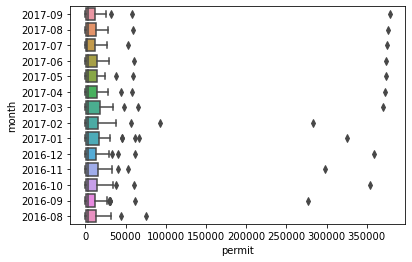

In [15]:
var_extreme('permit')

> Repartition du **permit** en fonction du mois **month**

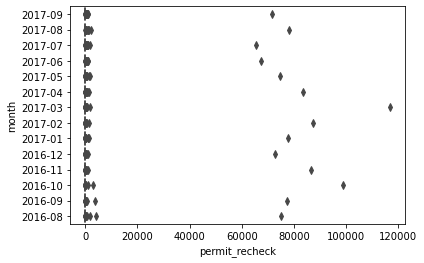

In [16]:
var_extreme('permit_recheck')  

>Repartition du **permit_recheck** en fonction de **month**

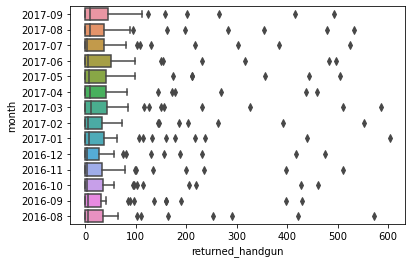

In [17]:
var_extreme('returned_handgun')  

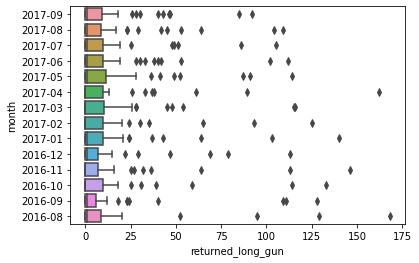

In [18]:
var_extreme('returned_long_gun')  

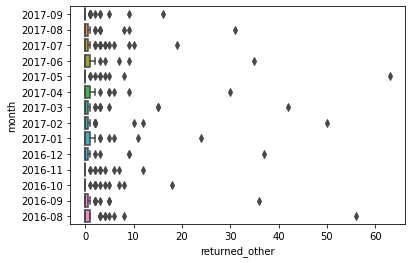

In [19]:
var_extreme('returned_other')

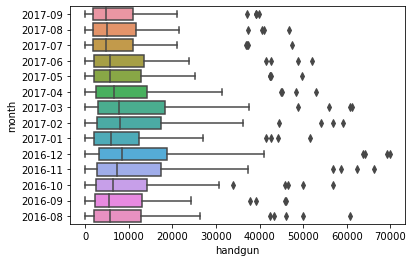

In [20]:
var_extreme('handgun')  

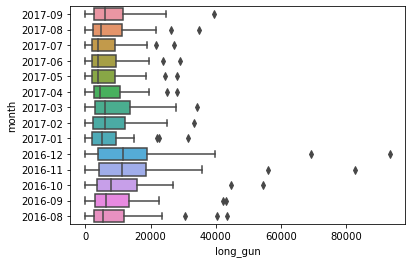

In [21]:
var_extreme('long_gun')

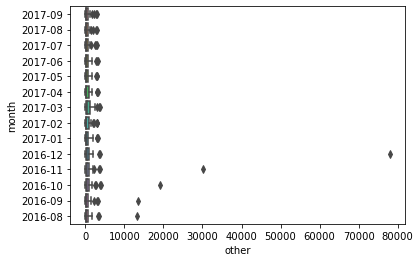

In [22]:
var_extreme('other')

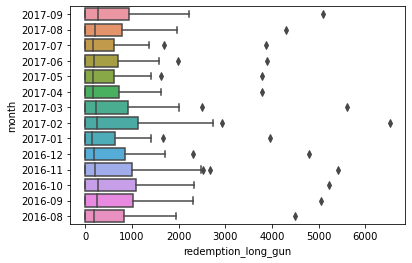

In [23]:
var_extreme('redemption_long_gun')

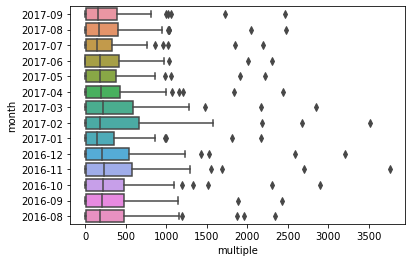

In [24]:
var_extreme('multiple')

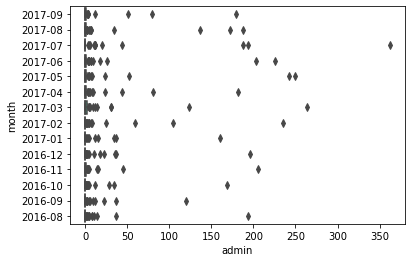

In [25]:
var_extreme('admin')

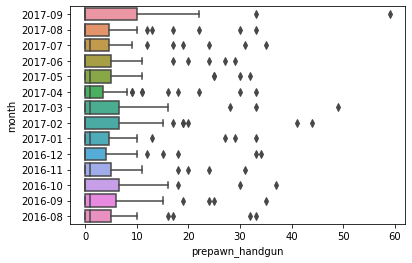

In [26]:
var_extreme('prepawn_handgun')

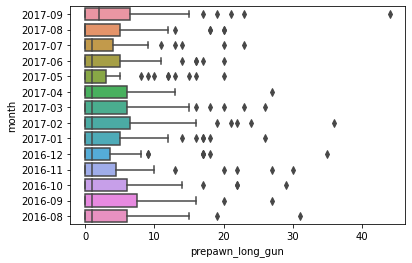

In [27]:
var_extreme('prepawn_long_gun')

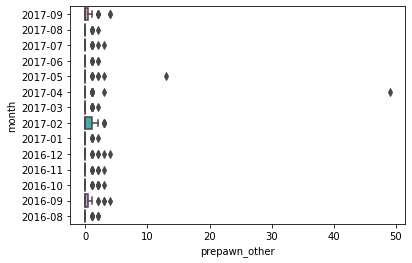

In [28]:
var_extreme('prepawn_other')

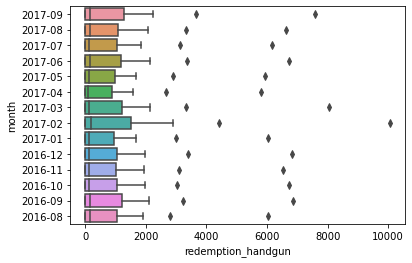

In [29]:
var_extreme('redemption_handgun')

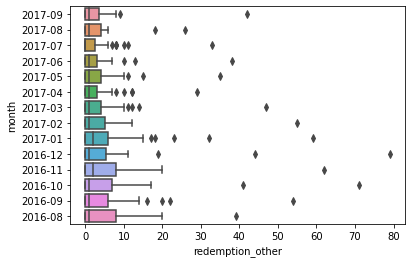

In [30]:
var_extreme('redemption_other')

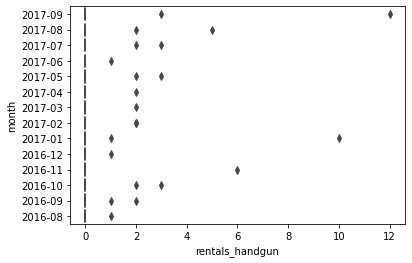

In [31]:
var_extreme('rentals_handgun')

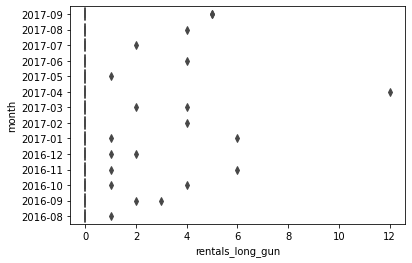

In [32]:
var_extreme('rentals_long_gun')

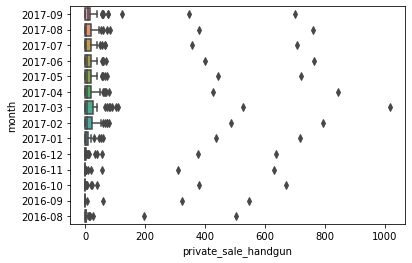

In [33]:
var_extreme('private_sale_handgun')

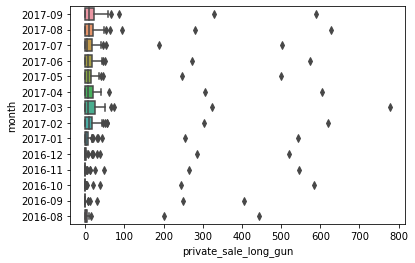

In [34]:
var_extreme('private_sale_long_gun')

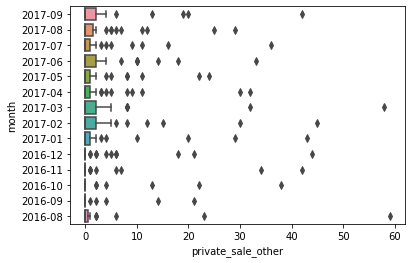

In [35]:
var_extreme('private_sale_other')

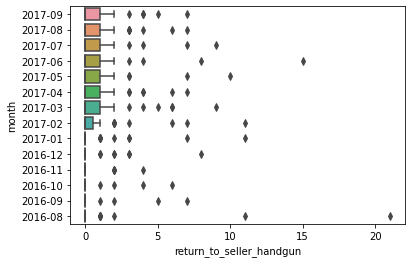

In [36]:
var_extreme('return_to_seller_handgun')

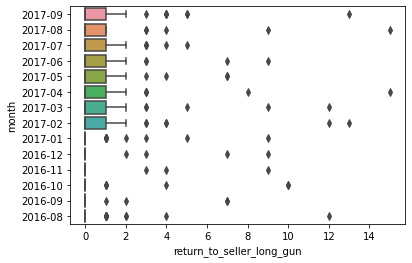

In [37]:
var_extreme('return_to_seller_long_gun')

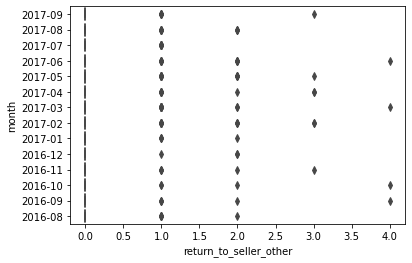

In [38]:
var_extreme('return_to_seller_other')

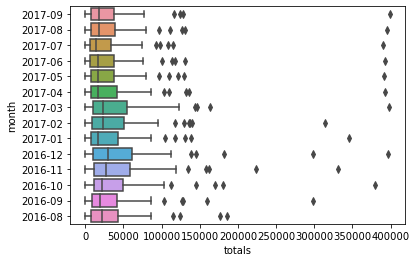

In [39]:
var_extreme('totals')

#### Utilisation de la methode des quantiles pour supprimer les valeurs extrêmes

In [40]:
# methode des quantiles
def methode_quartiles(col):
    g10 =df_gun_cp[col].quantile(0.10)
    g90 =df_gun_cp[col].quantile(0.90)
    df_gun_cp[col] = np.where(df_gun_cp[col]< g10, g10, df_gun_cp[col])
    df_gun_cp[col] = np.where(df_gun_cp[col]> g90, g90, df_gun_cp[col])
    sns.boxplot(x=col,y='month', data=df_gun_cp)
    plt.show()


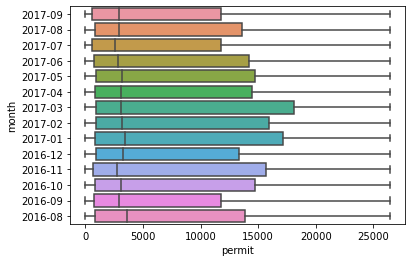

In [41]:
methode_quartiles('permit')

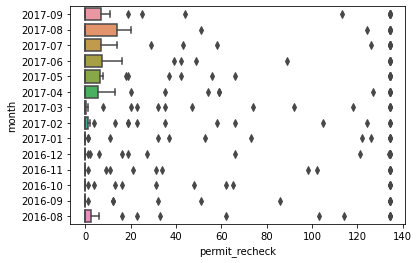

In [42]:
methode_quartiles('permit_recheck')

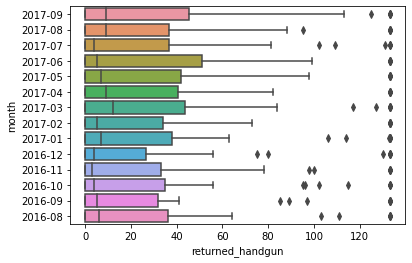

In [43]:
methode_quartiles('returned_handgun')

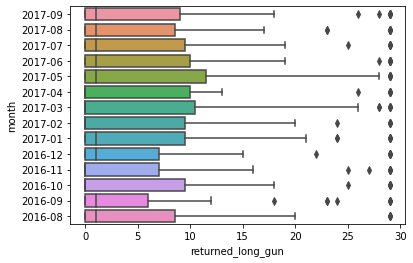

In [44]:
methode_quartiles('returned_long_gun')

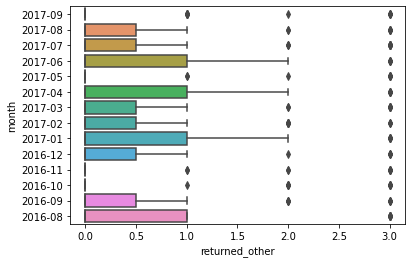

In [45]:
methode_quartiles('returned_other')

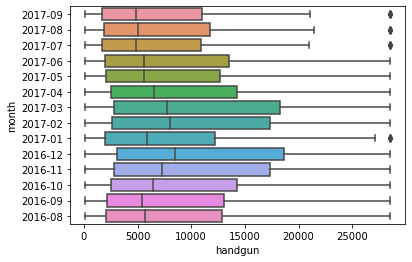

In [46]:
 methode_quartiles('handgun')

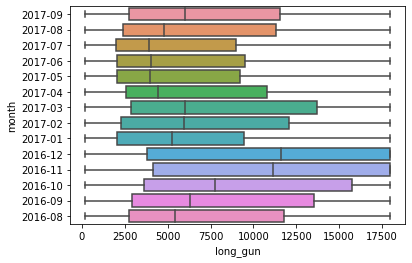

In [47]:
methode_quartiles('long_gun')

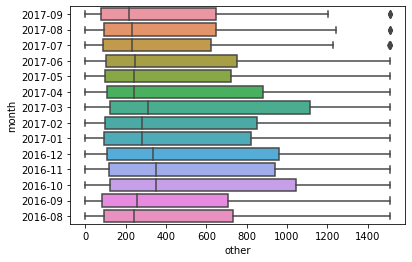

In [48]:
methode_quartiles('other')

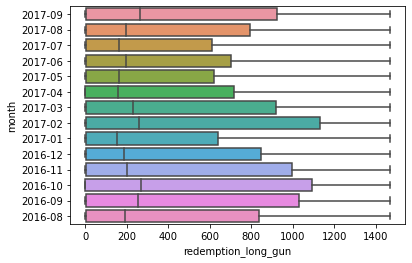

In [49]:
methode_quartiles('redemption_long_gun')

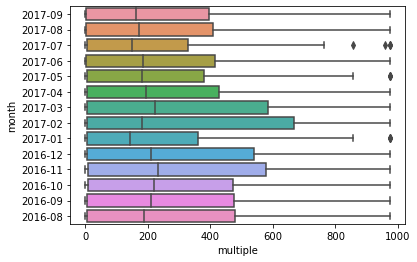

In [50]:
methode_quartiles('multiple')

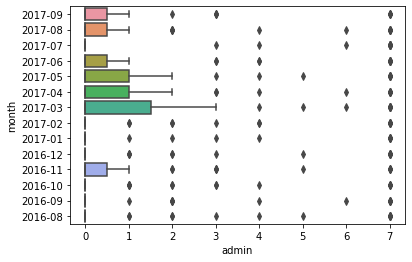

In [51]:
methode_quartiles('admin')

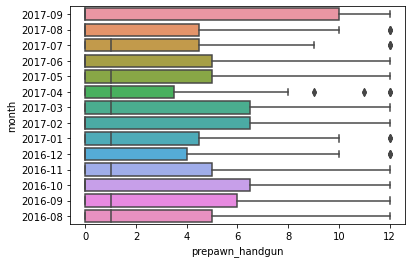

In [52]:
methode_quartiles('prepawn_handgun')

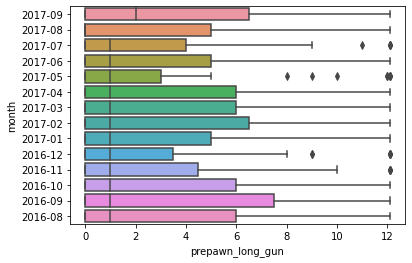

In [53]:
methode_quartiles('prepawn_long_gun')

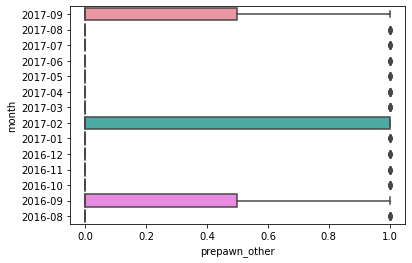

In [54]:
methode_quartiles('prepawn_other')

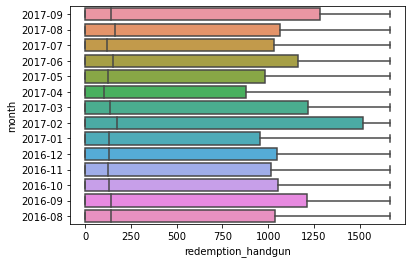

In [55]:
methode_quartiles('redemption_handgun')

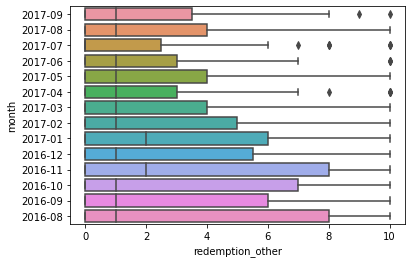

In [56]:
methode_quartiles('redemption_other')

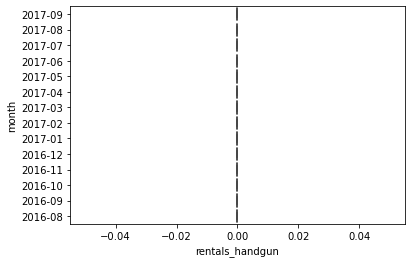

In [57]:
methode_quartiles('rentals_handgun')

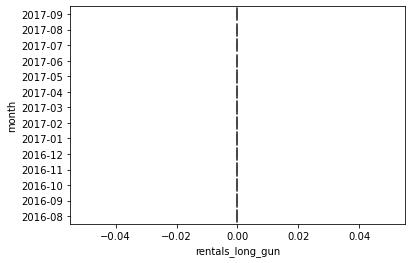

In [58]:
methode_quartiles('rentals_long_gun')

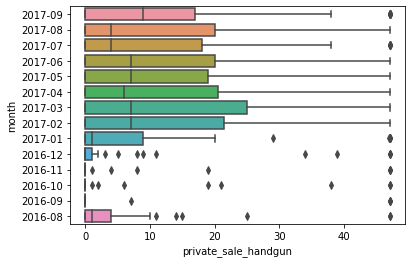

In [59]:
methode_quartiles('private_sale_handgun')

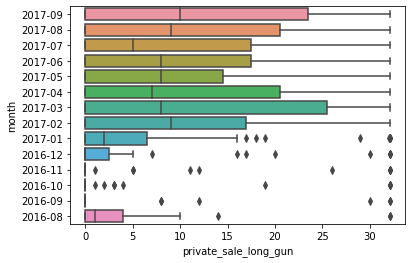

In [60]:
methode_quartiles('private_sale_long_gun')

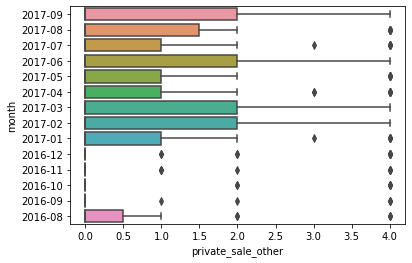

In [61]:
methode_quartiles('private_sale_other')

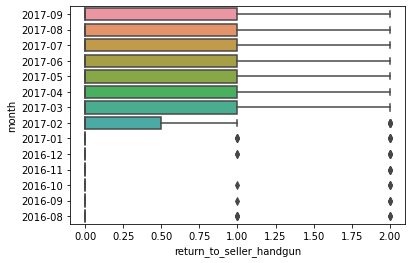

In [62]:
methode_quartiles('return_to_seller_handgun')

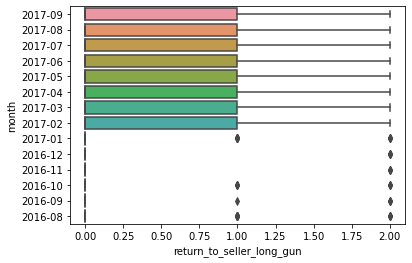

In [63]:
methode_quartiles('return_to_seller_long_gun')

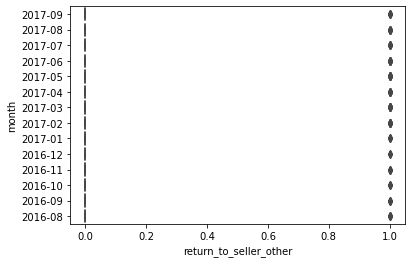

In [64]:
methode_quartiles('return_to_seller_other')

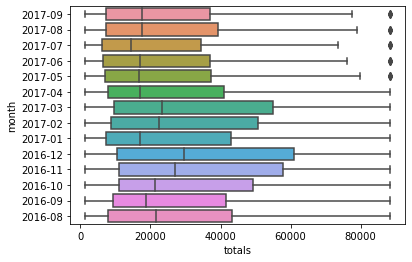

In [65]:
methode_quartiles('totals')

#### suppression des valeurs extêmes avec la transformation algorithmique methode des log
> Ici on traite simplement les variables dont leurs valeurs extrêmes n'ont pas été nettoyer par la methode des quartiles.

In [66]:
#fonction avec log
def changement_dechelle(col):
    print("Transformation algorithmique")
    #les fonction log se trouve dans numpy
    df_gun_cp[col] = df_gun_cp[col]
    df_gun_cp[col] = df_gun_cp[col].map(lambda i: np.log(i) if i>0 else 0)
    sns.boxplot(x=col, y='month',data=df_gun_cp)
    plt.show()

Transformation algorithmique


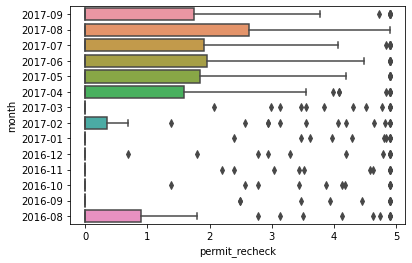

In [67]:
changement_dechelle('permit_recheck')

Transformation algorithmique


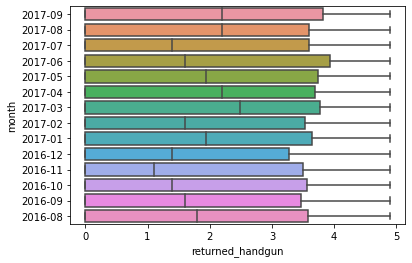

In [68]:
changement_dechelle('returned_handgun')

Transformation algorithmique


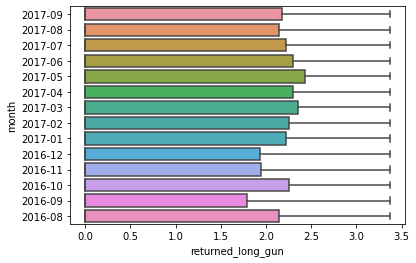

In [69]:
changement_dechelle('returned_long_gun')

Transformation algorithmique


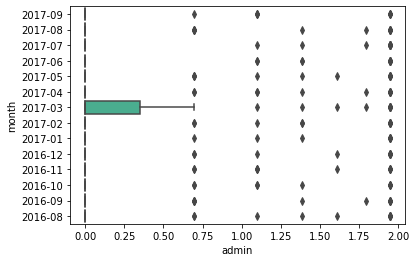

In [70]:
changement_dechelle('admin')

Transformation algorithmique


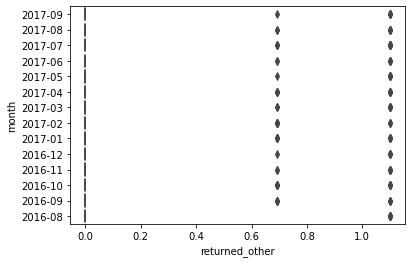

In [71]:
changement_dechelle('returned_other')

Transformation algorithmique


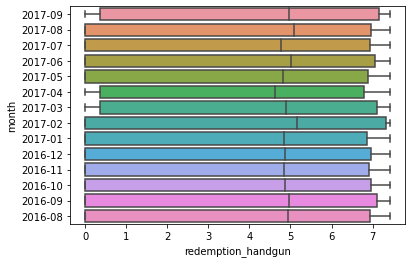

In [72]:
changement_dechelle('redemption_handgun')

Transformation algorithmique


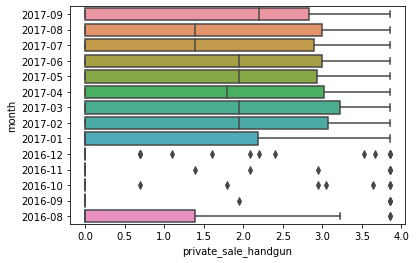

In [73]:
changement_dechelle('private_sale_handgun')

Transformation algorithmique


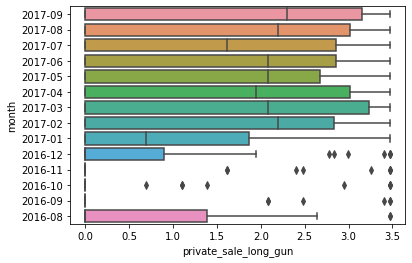

In [74]:
changement_dechelle('private_sale_long_gun')

Transformation algorithmique


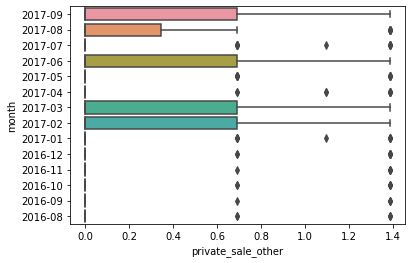

In [75]:
changement_dechelle('private_sale_other')

Transformation algorithmique


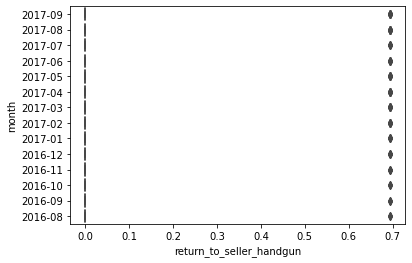

In [76]:
changement_dechelle('return_to_seller_handgun')

Transformation algorithmique


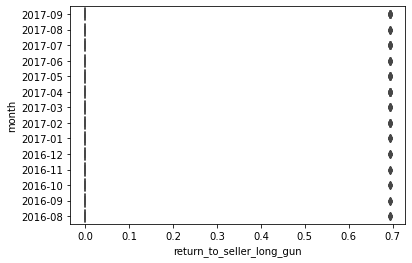

In [77]:
changement_dechelle('return_to_seller_long_gun')

#### Suppression des valeurs extrêmes 
> On doit supprimer les valeurs extrêmes des variables n'ont pas été propre apres l'utilisation de la methode des **quartiles** et de la methode **log** 

In [78]:
# fonction pour supprimer les valeurs extrêmes
def suppression_valeur(col):
    #Supprimer les valeurs externes(Conserver les valeurs interquartiles)
    print("Suppression des valeurs externes(Conservation des valeurs interquartiles) \n")
    q1 = df_gun_cp[col].quantile(0.25)
    q3 = df_gun_cp[col].quantile(0.75)
    index = df_gun_cp[(df_gun_cp[col]<q1) | (df_gun_cp[col] >q3)].index
    print(index)
    df_gun_cp.drop(index, inplace =True)
    sns.boxplot(x=col,y='month', data=df_gun_cp)
    plt.show()


Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([  2,   3,   6,  14,  16,  17,  24,  29,  34,  37,
            ...
            732, 738, 739, 744, 752, 754, 760, 762, 766, 769],
           dtype='int64', length=190)


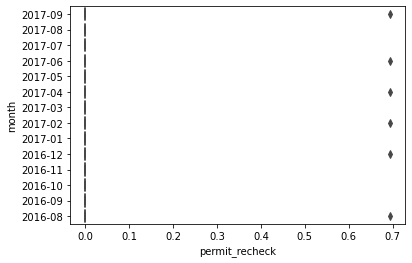

In [79]:
suppression_valeur('permit_recheck')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([ 15,  28,  31,  36,  40,  52,  70,  78,  86,  91,
            ...
            699, 700, 712, 721, 724, 730, 743, 746, 755, 767],
           dtype='int64', length=106)


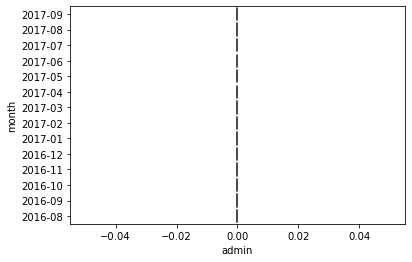

In [80]:
suppression_valeur('admin')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([ 42,  53,  68,  80,  82, 100, 135, 137, 155, 163, 210, 218, 247,
            265, 273, 280, 288, 302, 320, 328, 355, 357, 361, 372, 375, 427,
            430, 438, 445, 460, 465, 467, 485, 493, 522, 537, 540, 592, 595,
            614, 632, 647, 650, 677, 702, 705, 713, 742, 757, 768],
           dtype='int64')


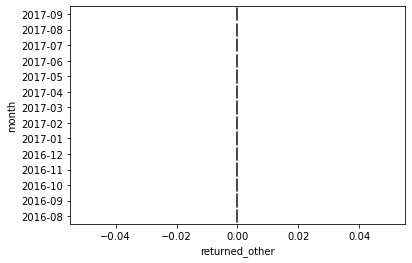

In [81]:
suppression_valeur('returned_other')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([  1,   7,   9,  10,  18,  19,  20,  23,  25,  26,
            ...
            514, 518, 533, 588, 639, 640, 643, 694, 749, 761],
           dtype='int64', length=102)


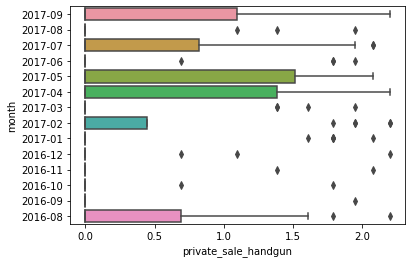

In [82]:
suppression_valeur('private_sale_handgun')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([  0,  35,  77, 123, 152, 187, 209, 246, 264, 276, 308, 352, 371,
            385, 407, 441, 462, 505, 517, 530, 572, 627, 682, 722],
           dtype='int64')


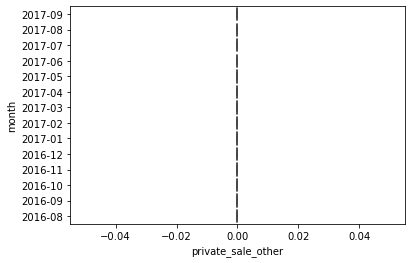

In [83]:
suppression_valeur('private_sale_other')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([ 13,  22,  33,  44,  48,  72,  88,  97,  99, 108, 132, 143, 145,
            154, 191, 198, 240, 242, 253, 255, 284, 297, 301, 319, 331, 366,
            374, 378, 383, 386, 391, 405, 416, 429, 433, 453, 458, 459, 466,
            473, 475, 484, 495, 504, 508, 538, 569, 585, 593, 624, 648, 679,
            695, 715, 725, 728, 733, 734, 737, 740, 748, 750, 753],
           dtype='int64')


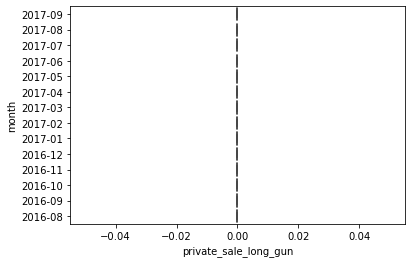

In [84]:
suppression_valeur('private_sale_long_gun')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([], dtype='int64')


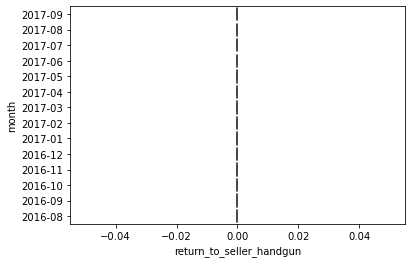

In [85]:
suppression_valeur('return_to_seller_handgun')

Suppression des valeurs externes(Conservation des valeurs interquartiles) 

Int64Index([], dtype='int64')


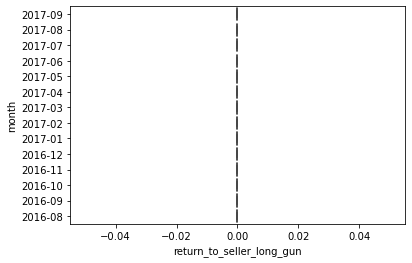

In [86]:
suppression_valeur('return_to_seller_long_gun')

> Apres l'utilisation de l'ensemble des methodes pour la visualisation,l'observation et la suppression des valeurs extrêmes, On va passer à la suppression des colonnes inutiles où des colonnes que l'on peu s'en passer pour faire notre analyse.

#### Suppression des colonnes inutiles
> - admin
> - permit_recheck
> - returned_other
> - rentals_long_gun
> - rentals_handgun
> - return_to_seller_handgun
> - return_to_seller_long_gun
> - return_to_seller_other
> - private_sale_handgun
> - private_sale_long_gun
> - private_sale_other

In [87]:
df_gun_cp.drop(['admin','permit_recheck','returned_other','rentals_long_gun','rentals_handgun',
                'return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other',
                'private_sale_handgun','private_sale_long_gun','private_sale_other'],axis=1,inplace=True)

> La suppression des colonnes mentionner dans la cellules ci-dessus met fin notre étape de nettoyages des données. Ceci etant fait, nous allons passer a la phase de **l'analyses exploratoires des données**

# Analyse Exploratoires des données

Nous allons commencer par faire une petite comparaison des données avant et apres le nettoyages

In [88]:
#Avant netoyages
print('*********** Avant le nettoyages nous avions {} lignes et {} colonnes et la tailles etait {} ********** '.format(df_gun.shape[0],df_gun.shape[1],df_gun.size))

*********** Avant le nettoyages nous avions 12485 lignes et 27 colonnes et la tailles etait 337095 ********** 


In [89]:
# apres nettoyages
print('*********** Aprés le nettoyages nous avons {} lignes et {} colonnes et la tailles est de {} ********** '.format(df_gun_cp.shape[0],df_gun_cp.shape[1],df_gun_cp.size))

*********** Aprés le nettoyages nous avons 235 lignes et 16 colonnes et la tailles est de 3760 ********** 


> Les données nettoyer seront enregsitrer dans un nouveau fichiers CSV

In [90]:
# Enregstrement d'un nouveau fichier csv
df_gun_cp.to_csv('data/gun_data_clean.csv',index=False)

In [91]:
# Lecture du nouveau fichier
df=pd.read_csv('data/gun_data_clean.csv')

In [92]:
# utilisation de la methode tail() qui affiche les 5 derniers lignes du dataset 
df.tail()

,month,state,permit,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,totals
230,2016-08,South Carolina,13000.0,8828.0,6906.0,494.0,330.0,4.0,7.0,0.0,6.924612,743.0,10.0,3.555348,1.386294,31389.0
231,2016-08,South Dakota,1259.0,2387.0,3559.0,202.0,133.0,0.0,0.0,0.0,4.927254,192.0,0.0,0.000000,0.000000,7873.0
232,2016-08,Vermont,0.0,1269.0,1296.0,108.0,47.0,0.0,0.0,0.0,0.000000,2.0,1.0,0.000000,0.000000,2724.0
233,2016-08,Virgin Islands,55.0,125.2,205.8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,1424.8
234,2016-08,Virginia,776.0,21108.0,15802.0,978.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,38667.0


> Affichages des 5 derniers lignes du dataset avcc la methodes tail() de pandas; dans le celulles suivante nous allons voir les details du dataset

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                235 non-null    object 
 1   state                235 non-null    object 
 2   permit               235 non-null    float64
 3   handgun              235 non-null    float64
 4   long_gun             235 non-null    float64
 5   other                235 non-null    float64
 6   multiple             235 non-null    float64
 7   prepawn_handgun      235 non-null    float64
 8   prepawn_long_gun     235 non-null    float64
 9   prepawn_other        235 non-null    float64
 10  redemption_handgun   235 non-null    float64
 11  redemption_long_gun  235 non-null    float64
 12  redemption_other     235 non-null    float64
 13  returned_handgun     235 non-null    float64
 14  returned_long_gun    235 non-null    float64
 15  totals               235 non-null    flo

> Les details sur les données; nous allons montrer les statistique descriptif des variables de types numériques;Ici on a 770 entrées (0 à 769).Vous avez aussi le nom des colonnes, leurs types et le nombres de valeurs non_null. Vous allez constater que l'on 770 entrées, toutes les colonnes on 770 valeurs non-null donc pas de valeurs null.

In [94]:
df.describe()

,permit,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,totals
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,4911.720000,7858.080000,6021.217021,399.281702,178.154043,1.514894,1.623830,0.085106,2.438787,242.952340,1.855319,0.937726,0.524984,22116.445106
std,8927.247264,9527.487204,6643.961247,510.377837,290.596633,3.460830,3.561971,0.279636,2.941384,449.494418,3.326327,1.552409,1.015590,28041.108319
min,0.000000,125.200000,205.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1424.800000
25%,0.000000,125.200000,205.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1424.800000
50%,819.000000,3992.000000,3040.000000,196.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9284.000000
75%,2810.500000,12639.000000,12221.500000,492.000000,245.500000,0.500000,1.000000,0.000000,5.677820,233.500000,2.000000,1.609438,0.693147,36314.500000
max,26413.700000,28476.000000,17932.800000,1508.400000,973.400000,12.000000,12.100000,1.000000,7.417040,1467.600000,10.000000,4.891101,3.367296,88253.000000


> Ici vous voyez les statistiques descriptives . La cellules suivantes vous montrera une vue globale sur la repartitins des données a l'aide d'un diagramme appelé histogramme de la methode **hist()** de pandas

array([[<AxesSubplot:title={'center':'permit'}>,
        <AxesSubplot:title={'center':'handgun'}>,
        <AxesSubplot:title={'center':'long_gun'}>,
        <AxesSubplot:title={'center':'other'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'prepawn_handgun'}>,
        <AxesSubplot:title={'center':'prepawn_long_gun'}>,
        <AxesSubplot:title={'center':'prepawn_other'}>],
       [<AxesSubplot:title={'center':'redemption_handgun'}>,
        <AxesSubplot:title={'center':'redemption_long_gun'}>,
        <AxesSubplot:title={'center':'redemption_other'}>,
        <AxesSubplot:title={'center':'returned_handgun'}>],
       [<AxesSubplot:title={'center':'returned_long_gun'}>,
        <AxesSubplot:title={'center':'totals'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

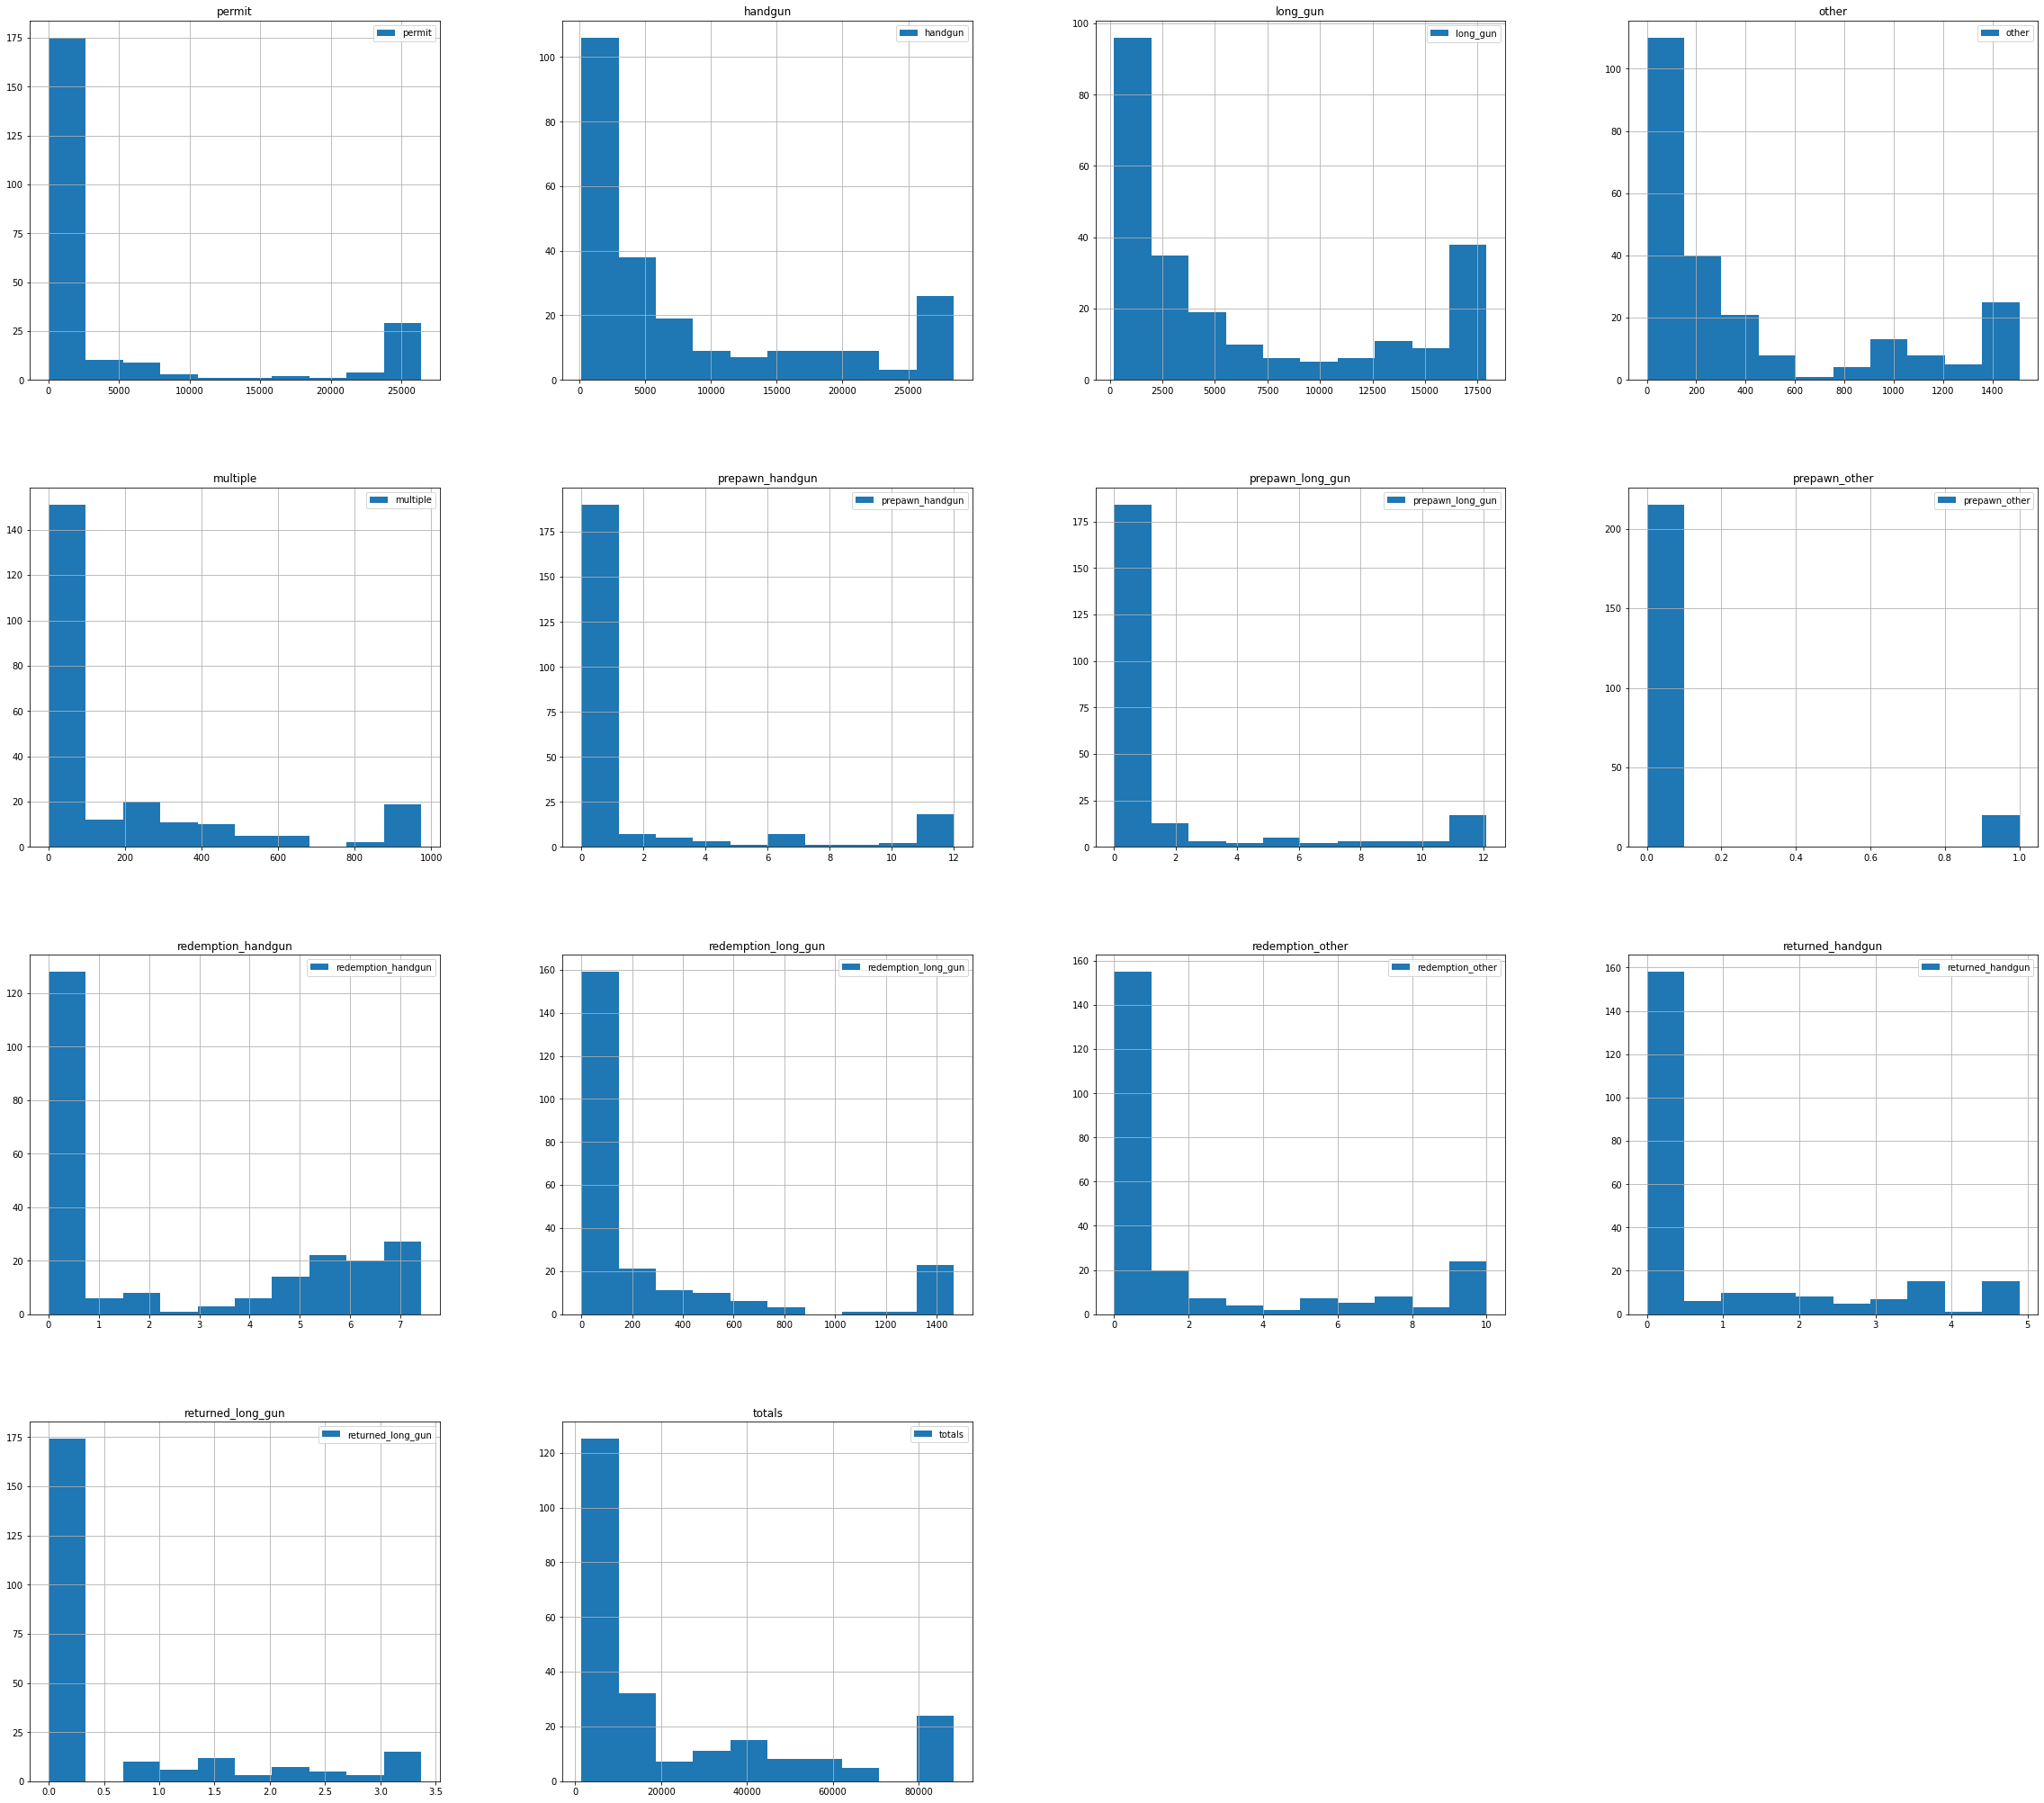

In [95]:
# Histogramme
df.hist(figsize=(40,36),legend=True)

> Ici On a une vue globales sur l'ensembles des variables du dataset. Sur les cellules qui vont suivre nous allons tenter des repondres au questions qui ont été poser dans la phase question un peu en haut.

## Quelles sont les types d'armes  les plus achetés en moyenne?

 7858.079999999994 d'armes de poing sont utilisées en moyenne 


array([[<AxesSubplot:title={'center':'handgun'}>]], dtype=object)

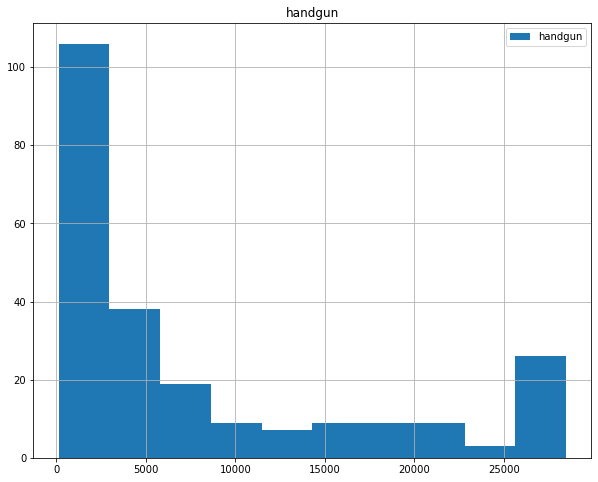

In [96]:
# la moyenne
print(" {} d'armes de poing sont utilisées en moyenne ".format(df['handgun'].mean()))
df.hist(legend=True,column='handgun',figsize=(10,8))

> 7858.079999999994 d'armes de poing sont utilisées en moyenne . La repartition des armes de poings en moyenne



 6021.217021276602 d'armes d'épaules sont utilisées en moyenne 


<AxesSubplot:>

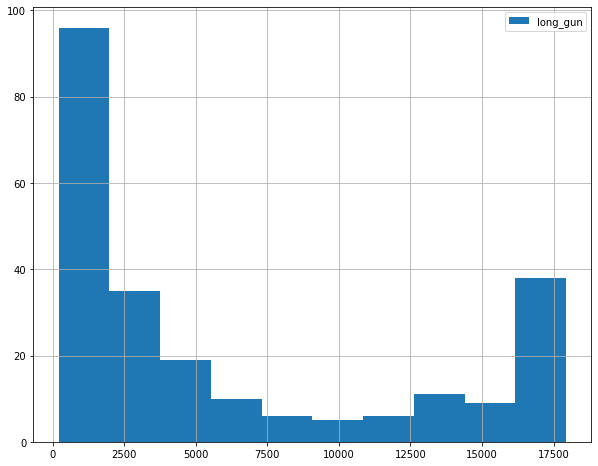

In [97]:
print(" {} d'armes d'épaules sont utilisées en moyenne ".format(df['long_gun'].mean()))
df['long_gun'].hist(figsize=(10,8),legend=True)

>  6021.217021276602d'armes d'épaules sont utilisées en moyenne. On a la repartitions d'armes d'épaules en moyenne


399.2817021276595 autres types d'armes sont utilisées en moyenne 


<AxesSubplot:>

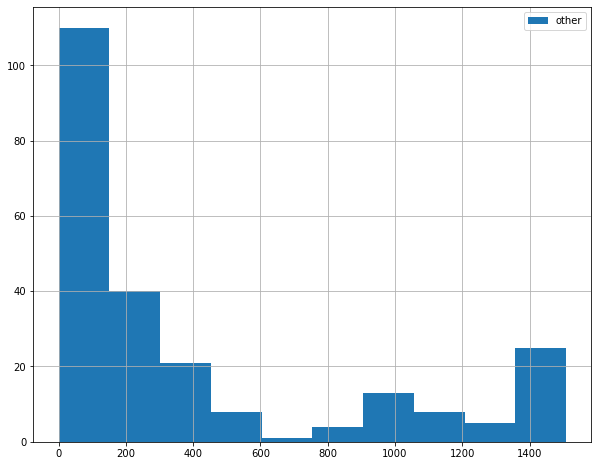

In [98]:
print("{} autres types d'armes sont utilisées en moyenne ".format(df['other'].mean()))
df['other'].hist(legend=True,figsize=(10,8))

> 399.2817021276595 autres types d'armes sont utilisées en moyenne .Repartition d'autres types d'armes en moyennes

([<matplotlib.patches.Wedge at 0x1d49ab8ebb0>,
 [Text(-0.17324012296324268, 1.0862724611236727, 'handgun'),
  Text(0.07726532057659248, -1.097283040166117, 'long_gun'),
  Text(1.095758017273731, -0.09651097129519559, 'other')])

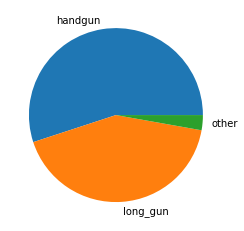

In [99]:
handgun = df['handgun'].mean()
long_gun = df['long_gun'].mean()
other = df['other'].mean()
arme = np.array([handgun,long_gun,other])
plt.pie(arme,labels=['handgun','long_gun','other'])

> On constate les types d'armes les plus achetés sont les armes de poing **(handgun)** ensuite vient les armes d'épaules **(long_gun)**

## Quels États ont connu la plus forte croissance dans enregistrements d'armes à feu ?

In [100]:
df.groupby('state').handgun.mean()

state
Alabama                  7441.000000
Alaska                   3353.600000
California              28476.000000
Colorado                19122.272727
Connecticut              6344.800000
Delaware                 2106.333333
District of Columbia      125.200000
Florida                 28476.000000
Georgia                 14689.333333
Guam                      125.328571
Hawaii                    125.200000
Idaho                    3518.500000
Kansas                   8494.000000
Kentucky                12296.500000
Maine                    4046.200000
Mariana Islands           125.200000
Minnesota               11427.750000
Mississippi              9642.200000
Missouri                20763.500000
Nevada                   4947.785714
New Jersey               5311.000000
New Mexico               5969.750000
North Dakota             1571.400000
Oklahoma                 9638.000000
Oregon                  15064.500000
Puerto Rico              1131.000000
Rhode Island             1196.00

Text(0, 0.5, 'Arme de poing')

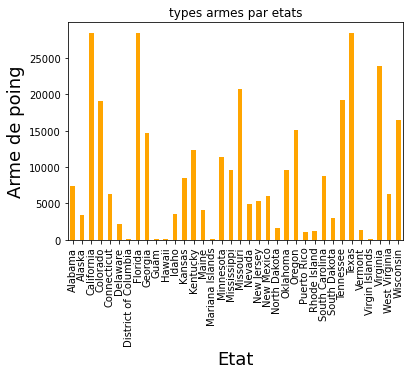

In [101]:
hand=df.groupby('state').mean().handgun
hand.plot(kind='bar',title='types armes par etats',color='orange',alpha=1)
plt.xlabel('Etat',fontsize=18,)
plt.ylabel('Arme de poing',fontsize=18)

>Ce graphe visualise l'ensemble des armes de poing Enregsitré en moyenne dans chaque États

In [102]:
df.groupby('state').mean().long_gun

state
Alabama                  8657.000000
Alaska                   3655.200000
California              17932.800000
Colorado                14152.872727
Connecticut              2339.600000
Delaware                 2242.333333
District of Columbia      205.800000
Florida                 17932.800000
Georgia                 12929.000000
Guam                      205.800000
Hawaii                    205.800000
Idaho                    5508.500000
Kansas                  10473.000000
Kentucky                12453.000000
Maine                    5097.000000
Mariana Islands           205.800000
Minnesota               15648.450000
Mississippi             10942.400000
Missouri                16730.400000
Nevada                   2875.500000
New Jersey               3650.500000
New Mexico               5571.500000
North Dakota             3381.200000
Oklahoma                10003.000000
Oregon                  12458.500000
Puerto Rico               215.276923
Rhode Island              687.00

Text(0, 0.5, "Arme d'epaules")

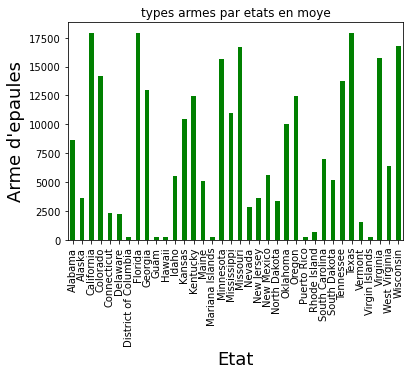

In [103]:
long=df.groupby('state').mean().long_gun
long.plot(kind='bar',title='types armes par etats en moye',color='green',alpha=1)
plt.xlabel('Etat',fontsize=18)
plt.ylabel('Arme d\'epaules',fontsize=18)

> Ce graphe visualise l'ensemble des armes d'epaules Enregsitré en moyenne dans chaque États

In [104]:
df.groupby('state').mean().other

state
Alabama                  361.000000
Alaska                   253.800000
California              1508.400000
Colorado                1234.290909
Connecticut              173.200000
Delaware                 106.333333
District of Columbia       0.000000
Florida                 1508.400000
Georgia                  534.666667
Guam                      11.714286
Hawaii                     0.000000
Idaho                    252.000000
Kansas                   450.000000
Kentucky                 327.750000
Maine                    277.000000
Mariana Islands            0.285714
Minnesota                889.000000
Mississippi              352.000000
Missouri                1398.000000
Nevada                   273.357143
New Jersey               197.000000
New Mexico               448.750000
North Dakota             105.600000
Oklahoma                 860.000000
Oregon                     0.000000
Puerto Rico               36.846154
Rhode Island              78.000000
South Carolina        

Text(0, 0.5, "Autres types d'armes")

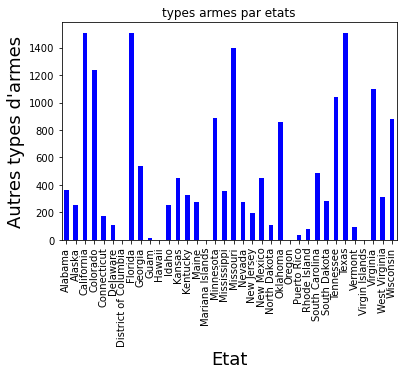

In [105]:
other=df.groupby('state').mean().other
other.plot(kind='bar',title='types armes par etats',color='blue',alpha=1)
plt.xlabel('Etat',fontsize=18)
plt.ylabel('Autres types d\'armes',fontsize=18)

> Ce graphe visualise les autres types d'armes Enregsitré dans chaque États en moyennne.

Ces graphes montre que les États comme **California,Colorado, Florida, Missouri, Texas,Tennessee,Virginia,Wisconsin** Ont connu le grandes nombres d'enregistrement d'armes de toutes types.


In [106]:
a=df.groupby(['handgun','long_gun','other']).count()['state']
a

handgun  long_gun  other 
125.2    205.8     0.0       51
                   1.0        5
                   5.0        1
                   7.0        2
                   8.0        2
                             ..
28476.0  16844.0   1227.0     1
         17754.0   1193.0     1
         17932.8   1298.0     1
                   1308.0     1
                   1508.4    20
Name: state, Length: 160, dtype: int64

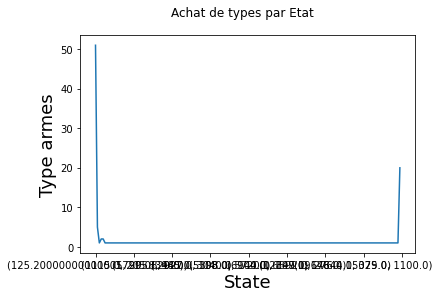

In [107]:
a.plot()
plt.suptitle('Achat de types par Etat')
plt.xlabel('State',fontsize=18)
plt.ylabel('Type armes',fontsize=18)
plt.show()

In [108]:
b=df.groupby(['handgun','long_gun','other']).count()['month']
b

handgun  long_gun  other 
125.2    205.8     0.0       51
                   1.0        5
                   5.0        1
                   7.0        2
                   8.0        2
                             ..
28476.0  16844.0   1227.0     1
         17754.0   1193.0     1
         17932.8   1298.0     1
                   1308.0     1
                   1508.4    20
Name: month, Length: 160, dtype: int64

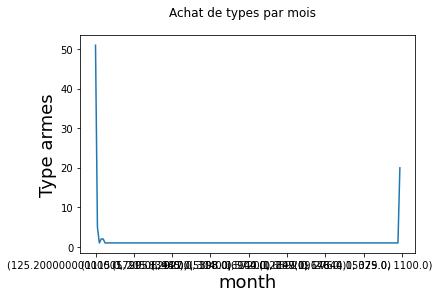

In [109]:
b.plot()
plt.suptitle('Achat de types par mois')
plt.xlabel('month',fontsize=18)
plt.ylabel('Type armes',fontsize=18)
plt.show()

## Quelle est la tendance générale des armes ? 

In [110]:
df[['handgun','long_gun','other']].mean()

handgun     7858.080000
long_gun    6021.217021
other        399.281702
dtype: float64

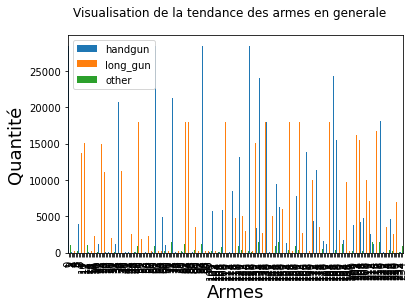

In [111]:
df[['handgun','long_gun','other']].plot(kind='bar')
plt.suptitle('Visualisation de la tendance des armes en generale')
plt.xlabel('Armes',fontsize=18)
plt.ylabel('Quantité',fontsize=18)
plt.show()

> Ce Graphe explicite l'achat et le contrôle de l'ensemble des armes au sein du **NCIS** .Ceci montre la tendance generale des armes enregistrées

# Conclusion

In [112]:
# calcul la moyenne des types d'armes
lamda=np.array(df[['handgun','long_gun','other']].mean())

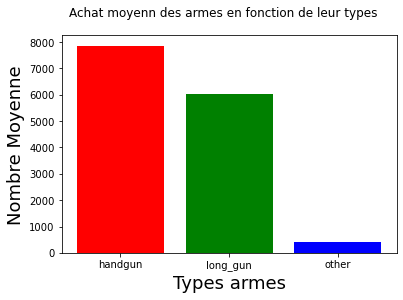

In [113]:
plt.bar(['handgun','long_gun','other'],lamda,color=['red','green','blue'])
plt.suptitle('Achat moyenn des armes en fonction de leur types')
plt.xlabel('Types armes',fontsize=18)
plt.ylabel('Nombre Moyenne',fontsize=18)
plt.show()

L'etude montre que les types d'armes le plus achetés par les acheteurs sont les armes poing (**handgun**).Le diagramme en bar utilisé montre une visualisation clair et nette sur l'achat des types d'armes en moyenne.

In [114]:
long = df["long_gun"].max()
long

17932.8

In [115]:
# utilisation de la fonction query() de pandas
df.query('long_gun == 17932.8')

,month,state,permit,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,totals
0,2017-09,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.282267,397.0,5.0,0.000000,0.000000,88253.0
12,2017-08,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.287859,429.0,10.0,0.000000,0.000000,88253.0
24,2017-07,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,5.973810,322.0,8.0,0.000000,0.000000,88253.0
36,2017-06,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.077642,308.0,5.0,0.000000,0.000000,88253.0
49,2017-05,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.070738,445.0,10.0,0.000000,0.000000,88253.0
61,2017-04,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.232448,345.0,5.0,0.000000,0.000000,88253.0
72,2017-03,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.415097,481.0,5.0,0.000000,0.000000,88253.0
82,2017-02,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.426488,481.0,5.0,0.000000,0.000000,88253.0
84,2017-02,Florida,23617.0,28476.0,17932.8,1508.4,973.4,6.0,3.0,0.0,7.417040,1467.6,10.0,4.891101,3.367296,88253.0
94,2017-01,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.173786,381.0,7.0,0.000000,0.000000,88253.0


In [116]:
hand =df["handgun"].max()
hand

28476.000000000004

In [117]:
df.query('handgun == 28476.000000000004')

,month,state,permit,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,totals
0,2017-09,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.282267,397.0,5.0,0.000000,0.000000,88253.0
12,2017-08,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.287859,429.0,10.0,0.000000,0.000000,88253.0
24,2017-07,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,5.973810,322.0,8.0,0.000000,0.000000,88253.0
36,2017-06,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.077642,308.0,5.0,0.000000,0.000000,88253.0
49,2017-05,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.070738,445.0,10.0,0.000000,0.000000,88253.0
61,2017-04,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.232448,345.0,5.0,0.000000,0.000000,88253.0
71,2017-04,Virginia,1074.0,28476.0,16844.0,1227.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.791759,0.000000,48631.0
72,2017-03,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.415097,481.0,5.0,0.000000,0.000000,88253.0
81,2017-03,Virginia,529.0,28476.0,17754.0,1193.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.708050,1.386294,49368.0
82,2017-02,California,26413.7,28476.0,17932.8,1508.4,0.0,0.0,0.0,0.0,6.426488,481.0,5.0,0.000000,0.000000,88253.0


> Les statistiques montrent que les Etats **Texas, California,Colorado, Florida, Missouri,Tennessee,Virginia,Wisconsin,Minnesota...**, on connue une nombre importante d'enregistrement d'arme à feu par mois. Donc le taux de criminalité est tres importantes dans ces zones.
L'analyse montre aussi que le nombre d'armes contrôlés  aux sein du NCIS est tres éléves.

### Limites
> Dans notre processus d'analyse nous avons rencontré certaines probléme:
Parexemple la correlation entre les variables du dataset et ceci peut avoir un impact sur l'analyse des l'ensembles des données.

In [118]:
df.corr()

,permit,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,totals
permit,1.000000,0.672167,0.701614,0.671948,0.329030,0.344848,0.310000,0.362310,0.598467,0.583365,0.761509,0.230721,0.192232,0.891244
handgun,0.672167,1.000000,0.953511,0.951049,0.404721,0.219758,0.192448,0.198437,0.374575,0.401815,0.530714,0.464626,0.369076,0.914011
long_gun,0.701614,0.953511,1.000000,0.916299,0.492508,0.320575,0.302260,0.229225,0.465234,0.504338,0.616228,0.522184,0.444385,0.921095
other,0.671948,0.951049,0.916299,1.000000,0.494089,0.197066,0.175890,0.178850,0.407584,0.387496,0.551569,0.538177,0.437713,0.881746
multiple,0.329030,0.404721,0.492508,0.494089,1.000000,0.574748,0.560207,0.297128,0.470443,0.598373,0.410624,0.680665,0.576257,0.443709
prepawn_handgun,0.344848,0.219758,0.320575,0.197066,0.574748,1.000000,0.936910,0.444683,0.647546,0.903271,0.588582,0.234309,0.052583,0.357116
prepawn_long_gun,0.310000,0.192448,0.302260,0.175890,0.560207,0.936910,1.000000,0.468616,0.655950,0.900747,0.588030,0.228709,0.040400,0.323993
prepawn_other,0.362310,0.198437,0.229225,0.178850,0.297128,0.444683,0.468616,1.000000,0.360564,0.471546,0.390034,0.201285,0.072649,0.301990
redemption_handgun,0.598467,0.374575,0.465234,0.407584,0.470443,0.647546,0.655950,0.360564,1.000000,0.797007,0.740582,0.200241,0.081903,0.549923
redemption_long_gun,0.583365,0.401815,0.504338,0.387496,0.598373,0.903271,0.900747,0.471546,0.797007,1.000000,0.768540,0.255043,0.087841,0.585156


> Ici on constate la correlation 
avec les variables du dataset est tres importantes et cela peu impacter sur les predictions à venir

## Réferences

<ul>
    <li><a href="https://pandas.pydata.org/docs/">Pandas</a></li>
    <li><a href="https://numpy.org/doc/">Numpy</a></li>
   <li><a href="https://matplotlib.org/stable/tutorials/introductory/pyplot.html">Matplotlib</a></li>
   <li><a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">Seaborn</a></li>
</ul>